# Agora, vamos trabalhar com um dataset de varejo!
---

## <font color="red">Pedidos do chefe!</font>
---

* Um relatório csv com apenas o montante de vendas de cada produto;
* Os valores médios de vendas de todos os produtos por ano;
* O produto com maior quantiade de produtos vendidos no ano de 2020;


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('../dados/varejo.csv')
df

,centro_dist,produto,quantidade,valor_unit,cliente,ano,mes,carteira
0,centro 1,produto 160,151.0,22.25,cliente 10,2020,2,carteira 3
1,centro 4,produto 92,275.0,16.96,cliente 8,2019,8,carteira 3
2,centro 3,produto 171,244.0,15.59,cliente 7,2017,2,carteira 3
3,centro 1,produto 138,241.0,20.42,cliente 5,2018,8,carteira 2
4,centro 5,produto 144,127.0,20.82,cliente 5,2018,3,carteira 2
...,...,...,...,...,...,...,...,...
99995,centro 4,produto 34,334.0,26.13,cliente 1,2018,12,carteira 1
99996,centro 1,produto 186,426.0,20.65,cliente 10,2019,9,carteira 3
99997,centro 5,produto 183,192.0,19.26,cliente 3,2018,8,carteira 1
99998,centro 4,produto 148,402.0,18.75,cliente 10,2018,3,carteira 3


In [5]:
df['total_venda'] = df.quantidade * df.valor_unit

In [6]:
df

,centro_dist,produto,quantidade,valor_unit,cliente,ano,mes,carteira,total_venda
0,centro 1,produto 160,151.0,22.25,cliente 10,2020,2,carteira 3,3359.75
1,centro 4,produto 92,275.0,16.96,cliente 8,2019,8,carteira 3,4664.00
2,centro 3,produto 171,244.0,15.59,cliente 7,2017,2,carteira 3,3803.96
3,centro 1,produto 138,241.0,20.42,cliente 5,2018,8,carteira 2,4921.22
4,centro 5,produto 144,127.0,20.82,cliente 5,2018,3,carteira 2,2644.14
...,...,...,...,...,...,...,...,...,...
99995,centro 4,produto 34,334.0,26.13,cliente 1,2018,12,carteira 1,8727.42
99996,centro 1,produto 186,426.0,20.65,cliente 10,2019,9,carteira 3,8796.90
99997,centro 5,produto 183,192.0,19.26,cliente 3,2018,8,carteira 1,3697.92
99998,centro 4,produto 148,402.0,18.75,cliente 10,2018,3,carteira 3,7537.50


## Um relatório csv com apenas o montante de vendas de cada produto

In [27]:
'produto 2' in df.produto.unique()

True

In [29]:
arquivo_exportar = df.groupby('produto').sum()[['quantidade', 'valor_unit', 'total_venda']]
arquivo_exportar.to_csv('../dados_exportados/vendas_produtos.csv')

### Os valores médios de vendas de todos os produtos por ano

In [40]:
vendas_media_ano = df.groupby('ano').mean()
vendas_media_ano

,quantidade,valor_unit,mes,total_venda
ano,,,,
2017,252.178888,19.998240,6.117749,5043.877461
2018,251.919724,20.024600,6.093009,5043.638521
2019,251.887393,20.024607,6.121460,5043.630524
2020,251.565850,20.069396,6.093999,5048.452004


<AxesSubplot:xlabel='ano'>

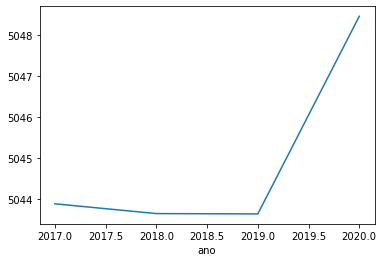

In [41]:
vendas_media_ano['total_venda'].plot()

### O produto com maior quantide de produtos vendidos no ano de 2020

In [44]:
varejo_2020 = df[df.ano == 2020]
varejo_2020.head()

,centro_dist,produto,quantidade,valor_unit,cliente,ano,mes,carteira,total_venda
0,centro 1,produto 160,151.0,22.25,cliente 10,2020,2,carteira 3,3359.75
6,centro 1,produto 118,412.0,22.85,cliente 4,2020,4,carteira 2,9414.20
8,centro 2,produto 117,137.0,20.75,cliente 7,2020,10,carteira 3,2842.75
9,centro 1,produto 65,212.0,19.14,cliente 10,2020,12,carteira 3,4057.68
11,centro 4,produto 141,289.0,20.94,cliente 3,2020,1,carteira 1,6051.66


<AxesSubplot:xlabel='produto'>

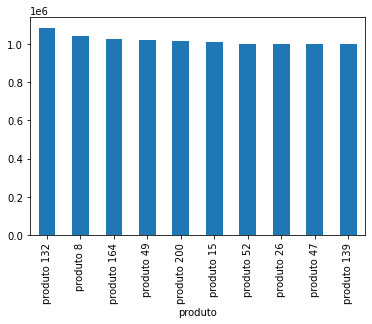

In [53]:
varejo_2020.groupby('produto').sum().sort_values(by='total_venda', ascending=False).head(10)['total_venda'].plot(kind='bar')